In [1]:
# 6.1.4 Create Latitude and Longitude Combinations
# import the dependancies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# output is a zip object in the memory, zip object packs each pair having hte same index
# in their respective array into a tuple. These can be accesses by the index of 0 and 1,
# latitude and longitude respectively.

In [3]:
# practice zipping and unzipping the tuples to see how it works:

# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [4]:
# add the latitudes and longitudes to a list

# you can only unzip a zipped tuple once before it is erased from the computer's memory.
# always make sure you unzip the lats and longs into the coordinates list before moving on

coordinates = list(lat_lngs)

In [5]:
# display the coordinate pairs, using the print() function to display the combinations

#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [6]:
from citipy import citipy

In [7]:
# 6.1.5 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [8]:
#  6.2.6  Import dependancies, Initialize and empty list and counters

#Import the time library and the timedate module from the datetime library

import time
from datetime import datetime

In [11]:
# Import the request library.

import requests

# Import the API key.

from config import weather_api_key

url ="https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# create an empty list to hold the weather data

city_data = []

#print the beginning of the logging.

print("Beginning Data Retrieval          ")
print("----------------------------------")


# create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list. Using enumerate() method
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # check remainder of index divided by 50 is 0, and if index is greater than
    # 50, if true then set count and record count are incremented by 1.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.  Here we are also removing the blank
    # spaces in the city name and concatinating the city name.  This will find
    # the corresopnding weather data for the city instead of finding the weather data
    # for the first part of the city name.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.  Printing counts and 
    # tells us which city is being processed
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        # "pass" is used as a general purpose statement to handle all errors encountered
        # and allows the program to continue.
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval          
----------------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | sembakung
Processing Record 4 of Set 1 | dwarka
Processing Record 5 of Set 1 | da nang
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | camacha
Processing Record 12 of Set 1 | kindu
Processing Record 13 of Set 1 | nishihara
Processing Record 14 of Set 1 | laureles
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | warqla
City not found. Skipping...
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | mponela
Processing Record 20 of Set 1 | kuche
City not found. Skipping...
Pro

Processing Record 38 of Set 4 | salalah
Processing Record 39 of Set 4 | ucluelet
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | katherine
Processing Record 42 of Set 4 | never
Processing Record 43 of Set 4 | changji
Processing Record 44 of Set 4 | mtimbira
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | lander
Processing Record 49 of Set 4 | kruisfontein
Processing Record 50 of Set 4 | saint-augustin
Processing Record 1 of Set 5 | wembley
Processing Record 2 of Set 5 | puerto ayacucho
Processing Record 3 of Set 5 | channel-port aux basques
Processing Record 4 of Set 5 | molina de segura
Processing Record 5 of Set 5 | zhangjiakou
Processing Record 6 of Set 5 | saint-georges
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | batemans bay
Processing Record 

Processing Record 24 of Set 8 | jinchang
Processing Record 25 of Set 8 | gizo
Processing Record 26 of Set 8 | kosh-agach
Processing Record 27 of Set 8 | makakilo city
Processing Record 28 of Set 8 | ampanihy
Processing Record 29 of Set 8 | yeppoon
Processing Record 30 of Set 8 | morondava
Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | port macquarie
Processing Record 33 of Set 8 | shijak
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | severo-kurilsk
Processing Record 36 of Set 8 | safford
Processing Record 37 of Set 8 | luebo
Processing Record 38 of Set 8 | wanning
Processing Record 39 of Set 8 | mujiayingzi
Processing Record 40 of Set 8 | esmeraldas
Processing Record 41 of Set 8 | kastamonu
Processing Record 42 of Set 8 | walvis bay
Processing Record 43 of Set 8 | mangochi
Processing Record 44 of Set 8 | itarema
Processing Record 45 of Set 8 | chara
Processing Record 46 of Set 8 | charters towers
Processing Record 47 of Set 8 | deputatsk

Processing Record 15 of Set 12 | taganak
Processing Record 16 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 17 of Set 12 | zyryanovsk
Processing Record 18 of Set 12 | great falls
Processing Record 19 of Set 12 | kudahuvadhoo
Processing Record 20 of Set 12 | pangnirtung
Processing Record 21 of Set 12 | mogoytuy
Processing Record 22 of Set 12 | terney
Processing Record 23 of Set 12 | hall
Processing Record 24 of Set 12 | vuktyl
Processing Record 25 of Set 12 | algiers
Processing Record 26 of Set 12 | aswan
Processing Record 27 of Set 12 | aksu
Processing Record 28 of Set 12 | hollins
Processing Record 29 of Set 12 | hvide sande
Processing Record 30 of Set 12 | bol
Processing Record 31 of Set 12 | tura
Processing Record 32 of Set 12 | busayra
Processing Record 33 of Set 12 | kysyl-syr
Processing Record 34 of Set 12 | pedra branca
Processing Record 35 of Set 12 | nizhneangarsk
Processing Record 36 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 12 

In [10]:
# This will only add the index, not the city name to the city_url and will cause
# programming errors down the road, so we would have to create another for loop
# to get the city from teh cities list.  We can use the emunerate() method above
# instead as this will do both.

## Loop through all the cities in our list.  
#for i in range(len(cities)):

#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

In [13]:
print(len(city_data))

580


In [14]:
# 6.2.7 convert data set(array of dictionaries) into dataFrame 

# Convert by creating a df

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,51.53,71,75,5.75,CA,2022-08-11 18:24:34
1,Atuona,-9.8000,-139.0333,76.84,74,32,26.13,PF,2022-08-11 18:19:58
2,Sembakung,3.8167,117.2500,72.70,99,96,1.70,ID,2022-08-11 18:24:35
3,Dwarka,22.2394,68.9678,81.77,88,100,4.79,IN,2022-08-11 18:24:35
4,Da Nang,16.0678,108.2208,80.58,89,20,0.00,VN,2022-08-11 18:24:29
5,Caravelas,-17.7125,-39.2481,77.76,58,96,9.98,BR,2022-08-11 18:23:54
6,Tasiilaq,65.6145,-37.6368,41.16,82,31,2.75,GL,2022-08-11 18:24:37
7,Vila Velha,-20.3297,-40.2925,76.95,61,0,17.27,BR,2022-08-11 18:24:38
8,Camacha,33.0833,-16.3333,71.02,68,20,10.36,PT,2022-08-11 18:24:38
9,Kindu,-2.9500,25.9500,80.28,29,80,1.45,CD,2022-08-11 18:24:39


In [17]:
# Reorder the columns in the order we want them to appear

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2022-08-11 18:24:34,63.7506,-68.5145,51.53,71,75,5.75
1,Atuona,PF,2022-08-11 18:19:58,-9.8000,-139.0333,76.84,74,32,26.13
2,Sembakung,ID,2022-08-11 18:24:35,3.8167,117.2500,72.70,99,96,1.70
3,Dwarka,IN,2022-08-11 18:24:35,22.2394,68.9678,81.77,88,100,4.79
4,Da Nang,VN,2022-08-11 18:24:29,16.0678,108.2208,80.58,89,20,0.00
5,Caravelas,BR,2022-08-11 18:23:54,-17.7125,-39.2481,77.76,58,96,9.98
6,Tasiilaq,GL,2022-08-11 18:24:37,65.6145,-37.6368,41.16,82,31,2.75
7,Vila Velha,BR,2022-08-11 18:24:38,-20.3297,-40.2925,76.95,61,0,17.27
8,Camacha,PT,2022-08-11 18:24:38,33.0833,-16.3333,71.02,68,20,10.36
9,Kindu,CD,2022-08-11 18:24:39,-2.9500,25.9500,80.28,29,80,1.45


In [18]:
# create the output file (csv)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into the CSV

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [19]:
# 6.3.1 creating scatter plot for latitude versus Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

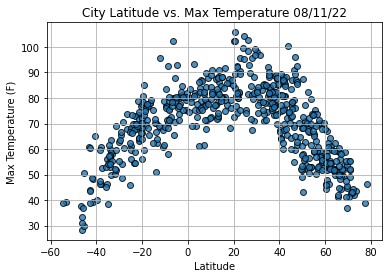

In [20]:
# Import the time module.
# Time module is standard in Python Library
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

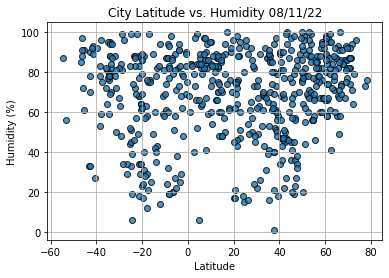

In [22]:
# Build the scatter plot for latitude vs. humidity. 6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

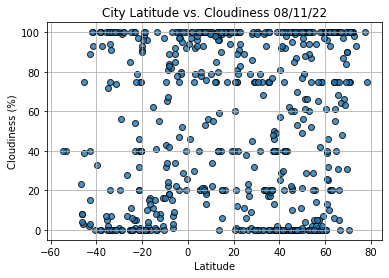

In [23]:
# Build the scatter plot for latitude vs. cloudiness. 6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

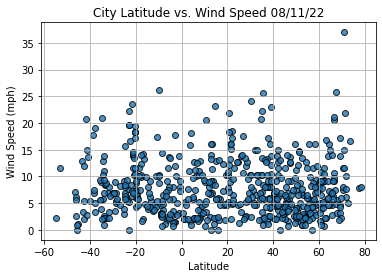

In [24]:
# Build the scatter plot for latitude vs. wind speed. 6.3.4
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()